In [111]:
import numpy as np
import matplotlib.pyplot as plt

learning rate: 0.01
number of clusters: 3


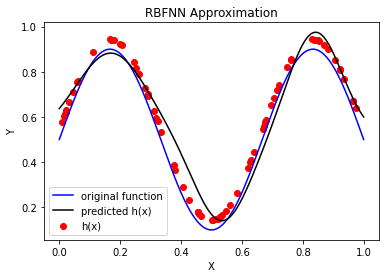

learning rate: 0.01
number of clusters: 6


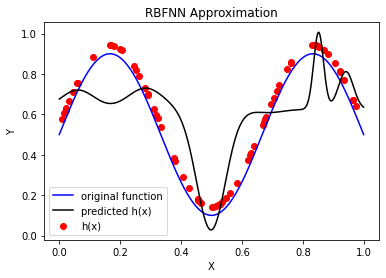

learning rate: 0.01
number of clusters: 8


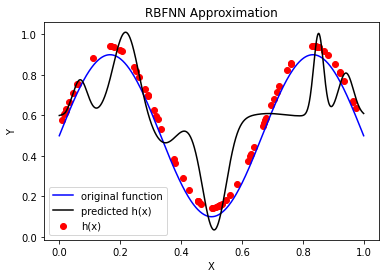

learning rate: 0.01
number of clusters: 12


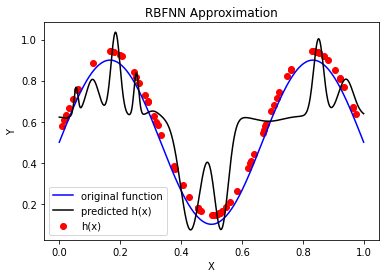

learning rate: 0.01
number of clusters: 16


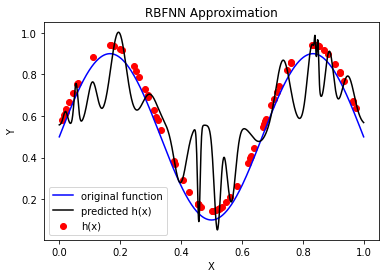

learning rate: 0.02
number of clusters: 3


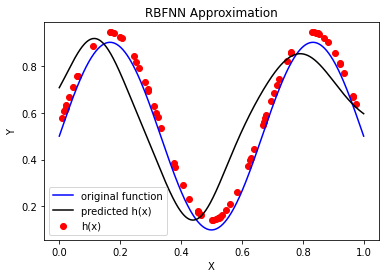

learning rate: 0.02
number of clusters: 6


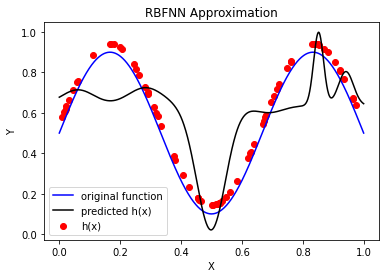

learning rate: 0.02
number of clusters: 8


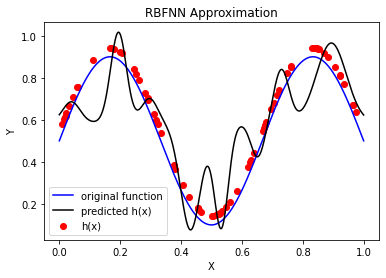

learning rate: 0.02
number of clusters: 12


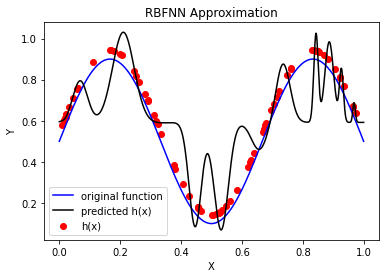

learning rate: 0.02
number of clusters: 16


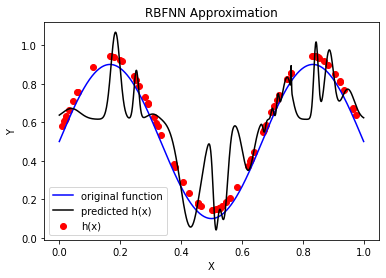

In [112]:
def myfunction(x):
  return 0.5 + 0.4*np.sin(3*np.pi*x)
  
x = np.random.rand(75,1)
hx = myfunction(x)+np.random.uniform(-0.1,0.1)

n_clusters = [3, 6, 8, 12, 16, 3, 6, 8, 12, 16]
learning_rates = [0.01, 0.01, 0.01, 0.01,0.01, 0.02, 0.02, 0.02, 0.02, 0.02]
epochs = 100

sse1 = []

for i, (learning_rate, clusters) in enumerate(zip(learning_rates, n_clusters)):
  rbf_nn = RBFNN(n_clusters=clusters, epochs=epochs, learning_rate=learning_rate, dynamic_cluster_variance=True)
  rbf_nn.train(x, hx)

  predict = rbf_nn.predict(xlabel)

  sse1.append(rbf_nn.get_sse(x, hx).item())

  plt.plot(xlabel, ylabel, color='blue', label='original function')
  plt.scatter(x, hx, color='red', label='h(x)')
  plt.plot(xlabel, predict, color='black', label='predicted h(x)')
  plt.title('RBFNN Approximation')

  plt.legend()
  plt.xlabel('X')
  plt.ylabel('Y')
  print("learning rate: "+str(learning_rate))
  print("number of clusters: "+ str(clusters))
  plt.show()

In [113]:
sse1

[0.2851330845524191,
 1.4262230803865006,
 1.1461890816898441,
 0.883450774702864,
 0.7468536302142592,
 1.4074972728023616,
 1.4235800637582725,
 0.7317874501945105,
 0.7421518207130205,
 0.635193536951308]

learning rate: 0.01
number of clusters: 3


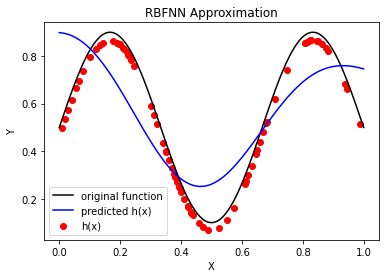

learning rate: 0.01
number of clusters: 6


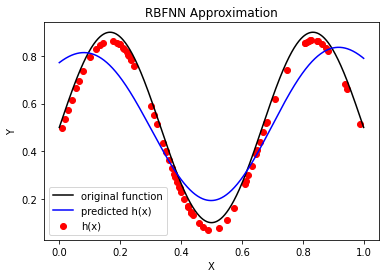

learning rate: 0.01
number of clusters: 8


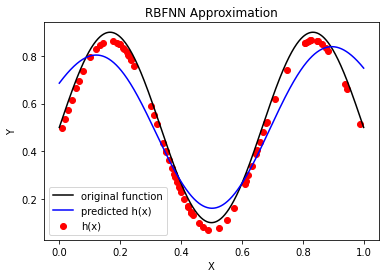

learning rate: 0.01
number of clusters: 12


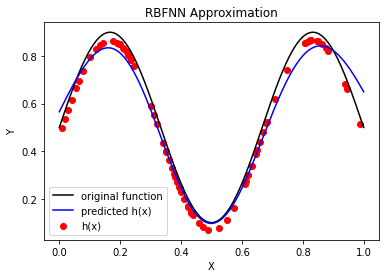

learning rate: 0.01
number of clusters: 16


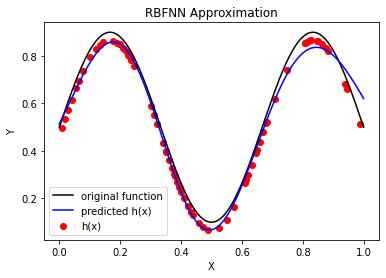

learning rate: 0.02
number of clusters: 3


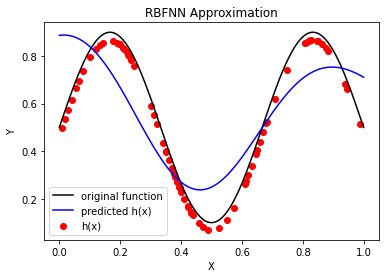

learning rate: 0.02
number of clusters: 6


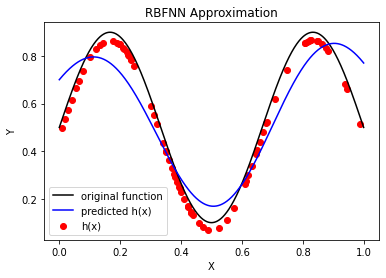

learning rate: 0.02
number of clusters: 8


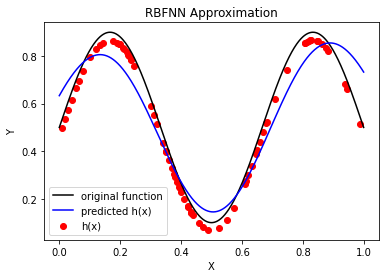

learning rate: 0.02
number of clusters: 12


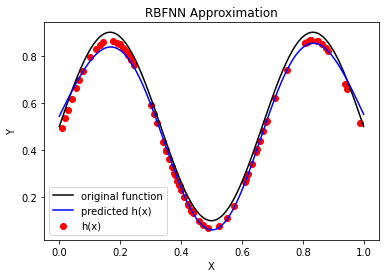

learning rate: 0.02
number of clusters: 16


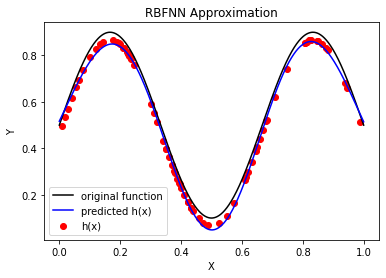

In [114]:
def myfunction(x):
  return 0.5 + 0.4*np.sin(3*np.pi*x)
  
x = np.random.rand(75,1)
hx = myfunction(x)+np.random.uniform(-0.1,0.1)

n_clusters = [3, 6, 8, 12, 16, 3, 6, 8, 12, 16]
learning_rates = [0.01, 0.01, 0.01, 0.01,0.01, 0.02, 0.02, 0.02, 0.02, 0.02]
epochs = 100

sse1 = []

for i, (learning_rate, clusters) in enumerate(zip(learning_rates, n_clusters)):
  rbf_nn = RBFNN(n_clusters=clusters, epochs=epochs, learning_rate=learning_rate, dynamic_cluster_variance=False)
  rbf_nn.train(x, hx)

  predict = rbf_nn.predict(xlabel)

  sse1.append(rbf_nn.get_sse(x, hx).item())

  plt.plot(xlabel, ylabel, color='black', label='original function')
  plt.scatter(x, hx, color='red', label='h(x)')
  plt.plot(xlabel, predict, color='blue', label='predicted h(x)')
  plt.title('RBFNN Approximation')

  plt.legend()
  plt.xlabel('X')
  plt.ylabel('Y')
  print("learning rate: "+str(learning_rate))
  print("number of clusters: "+ str(clusters))
  plt.show()

In [115]:
sse1

[1.7004562337619016,
 0.9027347604284893,
 0.5328807883127954,
 0.10642532121443625,
 0.046058358980902735,
 1.5667778920488002,
 0.638815429615576,
 0.4038666228221889,
 0.028591829756831076,
 0.012138668730086793]

Implementation of Kmean, Linear regression and RBF

In [116]:
class Kmeans():
    def __init__(self, n_clusters, epochs, flag):
        self.n_clusters = n_clusters  
        self.epochs = epochs  
        self.centroids = np.zeros(n_clusters)  
        self.variance = np.zeros(n_clusters)  
        self.flag = flag
        self.sse = 0  
    
    def get_centroids(self, x, hx):
        centroids = np.zeros((self.n_clusters, x.shape[1]))
        for i in range(self.n_clusters):
            centroids[i, :] = np.mean(x[hx == i, :], axis=0)
        return centroids

    def get_sse(self, x, clusters, centroids):
        distance = np.zeros(x.shape[0])
        for i in range(self.n_clusters):
            distance[clusters == i] = np.linalg.norm(
                x[clusters == i] - centroids[i], axis=1)
        return np.sum(np.square(distance))

    def get_variance(self, x, clusters):
        variance = np.zeros(self.n_clusters)
        for i in range(self.n_clusters):
            variance[i] = np.var(x[clusters == i])
        return variance

    def get_same_variance(self, centroids):
        max_distance = 0
        for i in range(self.n_clusters):
            for j in range(self.n_clusters):
                distance = np.linalg.norm(centroids[i] - centroids[j])
                if distance > max_distance:
                    max_distance = distance

        same_variance = np.ones(self.n_clusters) * \
            np.square(max_distance / np.sqrt(2 * self.n_clusters))

        return same_variance

    def train(self, x):
        self.centroids = np.random.permutation(x)[0:self.n_clusters]
        for i in range(self.epochs):
            old_assignment = self.centroids

            distance = np.zeros((x.shape[0], self.n_clusters))
            for k in range(self.n_clusters):
                distance[:, k] = np.square(np.linalg.norm(x - self.centroids[k, :], axis=1))
            clusters = np.argmin(distance, axis=1)  # find the closest centroid of a cluster to a data point
            self.centroids = self.get_centroids(x, clusters)

            if np.all(old_assignment == self.centroids):
                break

        self.sse = self.get_sse(x, clusters, self.centroids)

        if self.flag is False:
            self.variance = self.get_same_variance(self.centroids)
        else:
            self.variance = self.get_variance(x, clusters)

In [117]:
class LinearRegression():
    def __init__(self, variables):
        self.bias = 0
        self.weights = np.zeros((variables, 1))

    def linear_regression(self, x, hx, learning_rate, epochs):
        for i in range(epochs):
            for i, j in zip(x, hx):
                i = i.reshape(x.shape[1], 1)
                error = j - (np.dot(i.T, self.weights) + self.bias)
                self.bias += learning_rate * error
                self.weights += learning_rate * error * i

In [ ]:
class RBFNN():
    def __init__(self, n_clusters, epochs, learning_rate, flag):
        self.n_clusters = n_clusters  
        self.epochs = epochs 
        self.learning_rate = learning_rate  
        self.flag = flag
        self.sse = 0  

        self.kmeans = Kmeans(n_clusters=n_clusters, epochs=epochs, flag=self.flag)

        self.linear_regression = LinearRegression(n_clusters)

    def get_gaussians(self, x):
        gaussians = np.zeros((x.shape[0], self.n_clusters))
        for i, j in enumerate(x):
            for k, (centroid, variance) in enumerate(zip(self.kmeans.centroids, self.kmeans.variance)):
                gaussians[i, k] = np.exp((-1 / (2 * variance)) * (np.square(np.linalg.norm(j - centroid))))
        return gaussians

    def predict(self, x):
        gaussians = self.get_gaussians(x)
        return np.dot(gaussians, self.linear_regression.weights) + \
            self.linear_regression.bias

    def get_sse(self, x, hx):
        prediction = self.predict(x)
        errors = np.square(hx - prediction)
        return np.sum(errors)

    def train(self, x, hx):
        self.kmeans.train(x)
        gaussians = self.get_gaussians(x)
        self.linear_regression.linear_regression(gaussians, hx, self.learning_rate, self.epochs)
